In [60]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

# Uncertain Isocontours
This notebook implements the work of Pöthkow et. al [<sup id="fn1-back">1</sup>](#fn1)

[<sup id="fn1">1</sup>](#fn1-back): Pothkow und Hege, „Positional Uncertainty of Isocontours“.

In [73]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
from scipy import special
from ipywidgets import interact, interact_manual

## Model

In [2]:
def curve(x):
    return (x/10)**3 - 6*(x/10)**2 + 4*x/10 + 30

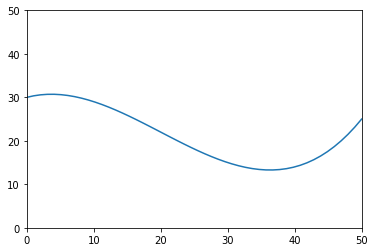

In [3]:
x = np.linspace(0, 50)
y = curve(x)

plt.figure()
plt.plot(x, y)
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

## Probability density function
\begin{align}
    {\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}
\end{align}

In [5]:
def normal(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp( - 0.5 * ( (x - mu)/sigma )**2 )

In [49]:
def generate_normal(i, j, m1=15., m2=7., var=1.):
    v = curve(i)
    
    mu = np.ones_like(i, dtype=np.float64)
    type1 = v >= j
    mu[ type1 ] = m1
    
    type2 = v < j
    mu[ type2 ] = m2
    
    variance = np.zeros_like(i, dtype=np.float64)
    variance = np.abs(v - j)
    variance /= np.max(variance)
    variance = 1 - variance + 1e-9
    variance *= var
    
    return mu, variance

# Isocontour Density
$$
    g_\theta (x) = \frac{1}{\sigma(x)\sqrt{2\pi}} exp \left( - \frac{1}{2} \left( \frac{\theta - \mu(x)}{\sigma(x)} \right)^2 \right)
$$

In [74]:
def g(contour, mean, variance):
    inner = - 0.5 * ( (contour - mean) / variance)**2
    denumerator = variance * np.sqrt(2 * np.pi)
    return np.exp(inner)/denumerator

In [75]:
@interact(mean1=(10.,15.), mean2=(1e-9,10), var=(1e-9,3), contour=(1e-9,15.))
def generate_icd(mean1=15., mean2=7., var=1., contour=10.):
    x = np.arange(50)
    y = np.arange(50)
    xx, yy = np.meshgrid(x, y)

    mean, variance = generate_normal(xx, yy, mean1, mean2, var)

    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    plt.title('Mean $\mu$')
    plt.imshow(mean)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.title('Variance $\sigma^2$')
    plt.imshow(variance)
    plt.colorbar()
    plt.show()
    
    sample = np.random.normal(mean, variance)
    icd = g(contour, mean, variance)

    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    plt.title('realization & contour')
    plt.imshow(sample)
    plt.colorbar()
    plt.contour(sample, levels=[contour], colors='r')
    plt.subplot(1,2,2)
    plt.title('ICD & contour')
    plt.imshow(icd)
    plt.colorbar()
    plt.contour(sample, levels=[contour], colors='r')
    plt.show()

interactive(children=(FloatSlider(value=15.0, description='mean1', max=15.0, min=10.0), FloatSlider(value=7.0,…

# Level-Crossing Probability Field
$$
    P_\theta (x) = \frac{1}{2} \left( 1 - Erf \left( \frac{\mu(x) - \theta}{\sqrt{2} \sigma(x)} \right) \right)
$$

In [77]:
def lcp(contour, mean, variance):
    inner = (mean - contour) / (np.sqrt(2)*variance)
    return 0.5 * ( 1 - special.erf(inner) )

In [78]:
@interact(mean1=(10.,15.), mean2=(1e-9,10), var=(1e-9,3), contour=(1e-9,15.))
def generate_icd(mean1=15., mean2=7., var=1., contour=10.):
    x = np.arange(50)
    y = np.arange(50)
    xx, yy = np.meshgrid(x, y)

    mean, variance = generate_normal(xx, yy, mean1, mean2, var)

    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    plt.title('Mean $\mu$')
    plt.imshow(mean)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.title('Variance $\sigma^2$')
    plt.imshow(variance)
    plt.colorbar()
    plt.show()
    
    sample = np.random.normal(mean, variance)
    LCP = lcp(contour, mean, variance)

    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    plt.title('realization & contour')
    plt.imshow(sample)
    plt.colorbar()
    plt.contour(sample, levels=[contour], colors='r')
    plt.subplot(1,2,2)
    plt.title('LCP & contour')
    plt.imshow(LCP)
    plt.colorbar()
    plt.contour(sample, levels=[contour], colors='r')
    plt.show()

interactive(children=(FloatSlider(value=15.0, description='mean1', max=15.0, min=10.0), FloatSlider(value=7.0,…